In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


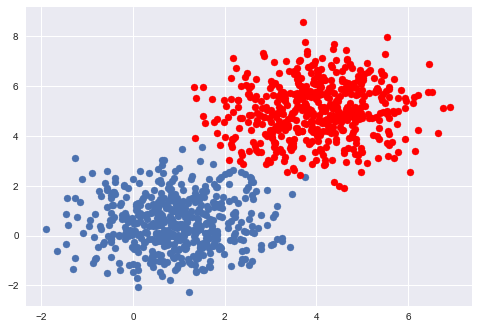

In [4]:
plt.style.use("seaborn")
plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1], color="red")
plt.show()

In [5]:
data = np.zeros((1000, 3))

In [6]:
data[:500, :2] = dist_01
data[500:, :2] = dist_02

data[500:, 2] = 1.0     

In [7]:
np.random.shuffle(data)
print(data[:10])

[[ 3.5084672   5.68443944  1.        ]
 [ 4.67380982  7.05041238  1.        ]
 [ 3.18613915  6.53698984  1.        ]
 [ 3.11714879  3.37276791  1.        ]
 [ 1.4629044  -0.44562305  0.        ]
 [ 1.89228535  1.27400486  0.        ]
 [ 3.99296619  5.47829005  1.        ]
 [ 0.93285237  0.45481348  0.        ]
 [ 1.53092797  1.72223116  0.        ]
 [ 1.98680242 -0.74802816  0.        ]]


In [8]:
split = int(0.8*data.shape[0])
X_train = data[:split, :-1]
X_test = data[split:, :-1]

Y_train = data[:split, -1]
Y_test = data[split:, -1]

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(800, 2) (200, 2) (800,) (200,)


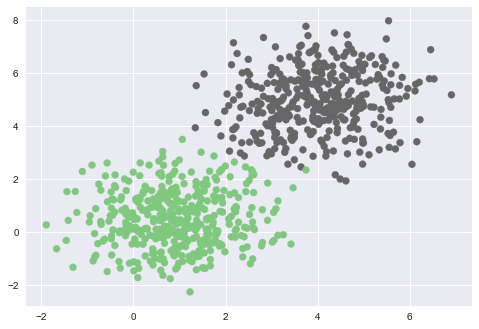

In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.Accent)
plt.show()

In [10]:
#Data Normalisation
x_mean = X_train.mean(axis=0)
x_std = np.std(X_train, axis=0)

X_train = (X_train-x_mean)/x_std

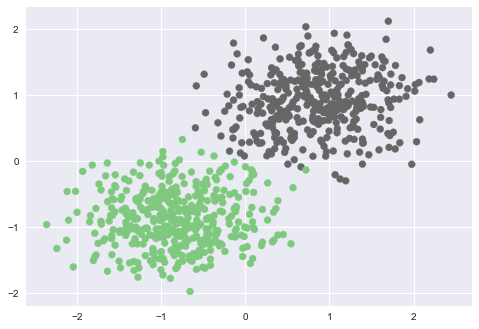

In [11]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.Accent)
plt.show()

In [12]:
X_test = (X_test - x_mean)/x_std

## Logistic Regression Implementation

In [13]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

def error(X, y, theta):
    hi = hypothesis(X, theta)
    e = -1*np.mean(y*np.log(hi) + (1-y)*np.log(1-hi))
    return e

In [14]:
def gradient(X, y, theta):
    hi = hypothesis(X, theta)
    grad = -np.dot(X.T, (y - hi))
    return grad/X.shape[0]

def grad_desc(X, y, lr, max_itr = 100):
    n = X.shape[1]
    theta = np.zeros((n, 1))

    error_list = []

    for i in range(max_itr):
        err = error(X, y, theta)
        error_list.append(err)

        grad = gradient(X, y, theta)
        theta = theta - lr*grad

    return (theta, error_list)

In [15]:
ones = np.ones((X_train.shape[0], 1))
X_train_ = np.hstack((ones, X_train))
Y_train = Y_train.reshape((-1, 1))
print(X_train_)

[[ 1.          0.5890196   1.20853548]
 [ 1.          1.22584038  1.75639252]
 [ 1.          0.41287809  1.55047178]
 ...
 [ 1.         -0.89500721 -0.51432465]
 [ 1.         -1.46940296 -0.54014517]
 [ 1.         -0.83789481 -0.15078184]]


In [16]:
theta, er = grad_desc(X_train_, Y_train, 0.5)

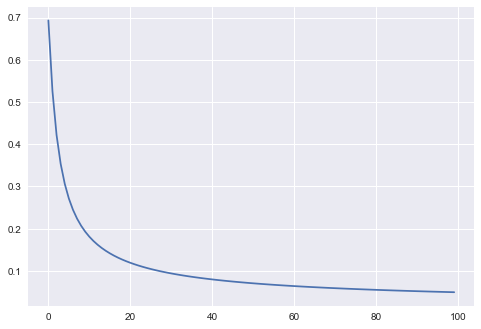

In [17]:
plt.plot(er)
plt.show()

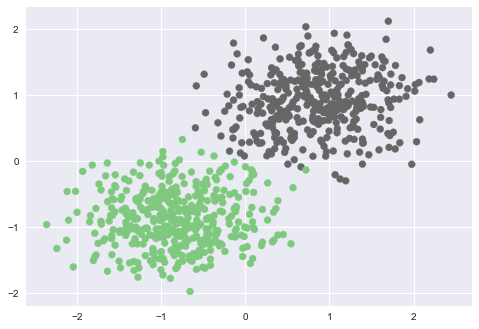

In [18]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train.reshape(-1), cmap=plt.cm.Accent)
plt.show()

In [19]:
theta

array([[-0.06591715],
       [ 2.24068415],
       [ 2.8545606 ]])

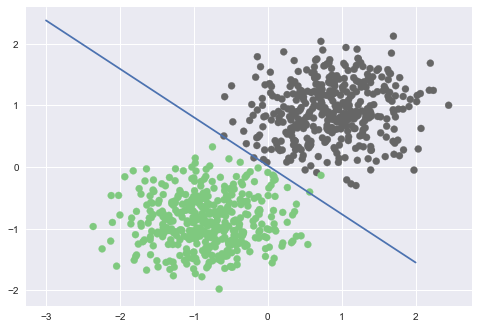

In [22]:
x1 = np.arange(-3, 3)
x2 = -(theta[0] + theta[1]*x1)/theta[2]

plt.plot(x1, x2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train.reshape(-1), cmap=plt.cm.Accent)
plt.show()

## Predict

In [26]:
def predict(X, theta):
    h = hypothesis(X, theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    output = output.astype('int')
    return output

In [28]:
X_train_Predict = predict(X_train_, theta)